<a href="https://colab.research.google.com/github/smomtahen/Neural-Networks/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#description : this program classifies images
#pip install keras

In [2]:
#load data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#print the data types
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print ('x_train shape', x_train.shape)
print ('y_train shape', y_train.shape)
print ('x_test shape', x_test.shape)
print ('y_test shape', y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [5]:
#look 1st img (at index=0) in training data set
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

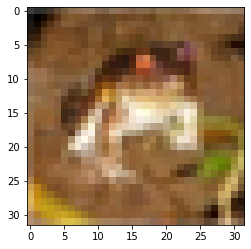

In [6]:
#show image as picture
import matplotlib.pyplot as plt
img=plt.imshow(x_train[0])


In [7]:
#print label of image 
print('the lable is :',y_train[0])

the lable is : [6]


In [8]:
#One-Hot encoding: convert labels into a set of 10 numbers to input into neural network
from keras.utils import to_categorical
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
#print new labels in training dataset
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
#print example new labels
print("one hot is :",y_train_one_hot[0])

one hot is : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#normalize pixels in images to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [0]:
#build CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
#create architecture
model=Sequential()
#convoltion layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#maxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#convoltion layer
model.add(Conv2D(32,(5,5),activation='relu'))
#maxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten layer
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
#compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
#train model
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 51s 1ms/step - loss: 1.6830 - acc: 0.3883 - val_loss: 1.4747 - val_acc: 0.4627
Epoch 2/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.3445 - acc: 0.5162 - val_loss: 1.3964 - val_acc: 0.5090
Epoch 3/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.2063 - acc: 0.5689 - val_loss: 1.2197 - val_acc: 0.5611
Epoch 4/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.0883 - acc: 0.6165 - val_loss: 1.1204 - val_acc: 0.6081
Epoch 5/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.0006 - acc: 0.6440 - val_loss: 1.0702 - val_acc: 0.6259
Epoch 6/10
35000/35000 [==============================] - 51s 1ms/step - loss: 0.9322 - acc: 0.6756 - val_loss: 1.0750 - val_acc: 0.6281
Epoch 7/10
35000/35000 [==

In [14]:
#get the model accuracy
model.evaluate(x_test,y_test_one_hot)

10000/10000 [==============================] - 5s 458us/step


[0.9504872116088867, 0.6753]

In [16]:
#load imahe data
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('cat.jpg')

Saving cat.jpg to cat.jpg


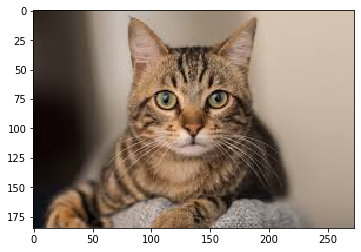

In [29]:
#show img
img=plt.imshow(my_image)

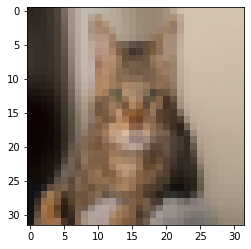

In [28]:
#resize img
from skimage.transform import resize
my_image_resized=resize(my_image, (32,32,3))
img=plt.imshow(my_image_resized)


In [0]:
#get probabilities for each class
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))
#print probabilities
probabilities

In [0]:
#save model
model.save('my_model.h5')
#load model
from keras.models import load_model
model=load_model('my_model.h5')